In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\SATYA GAYATHRI\\OneDrive\\Documents\\Data science\\Assignments\\MLR\\ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
# to check any missing values

In [6]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
# there are no missing values so its good to go with next step

In [8]:
# visualizations

In [9]:
# i am going with boxplot again because I want to check outliers and also treat them

<Axes: title={'center': 'boxplot'}>

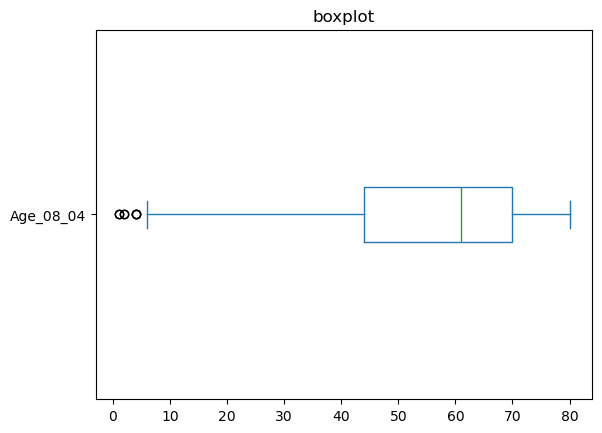

In [10]:
boxplot_age = df["Age_08_04"].plot(kind="box",vert=False,title='boxplot')
boxplot_age

In [11]:
import numpy as np

In [12]:
Q1 = np.percentile(df["Age_08_04"],25)
Q3 = np.percentile(df["Age_08_04"],75)
IQR = Q3 - Q1
IQR

np.float64(26.0)

In [13]:
UW = Q3 + (1.5 * IQR)
UW

np.float64(109.0)

In [14]:
print("#outliers are:",len(df[df["Age_08_04"]>UW]))

#outliers are: 0


In [15]:
LW = Q1 - (1.5 * IQR)
LW

np.float64(5.0)

In [16]:
print("#outliers are:",len(df[df["Age_08_04"]<LW]))

#outliers are: 7


In [17]:
# replacing outliers
df.loc[df["Age_08_04"] < LW, "Age_08_04"] = LW

In [18]:
df["Age_08_04"].describe()

count    1436.000000
mean       55.958914
std        18.566512
min         5.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age_08_04, dtype: float64

<Axes: title={'center': 'boxplot'}>

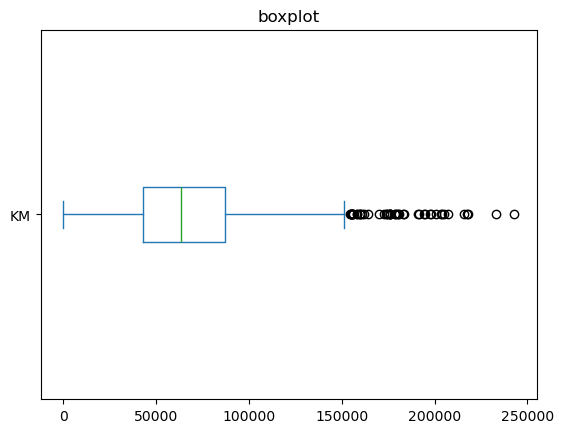

In [19]:
boxplot_KM = df["KM"].plot(kind="box",vert=False,title="boxplot")
boxplot_KM

In [20]:
Q1 = np.percentile(df["KM"],25)
Q3 = np.percentile(df["KM"],75)
IQR = Q3 - Q1
IQR

np.float64(44020.75)

In [21]:
UW = Q3 + (1.5 * IQR)
UW

np.float64(153051.875)

In [22]:
print("#outliers are:",len(df[df["KM"]>UW]))

#outliers are: 49


In [23]:
df.loc[df["KM"] > UW, "KM"] = UW

C:\Users\SATYA GAYATHRI\AppData\Local\Temp\ipykernel_6636\404444888.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '153051.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["KM"] > UW, "KM"] = UW


In [24]:
df["KM"].describe()

count      1436.000000
mean      67604.873172
std       34738.595454
min           1.000000
25%       43000.000000
50%       63389.500000
75%       87020.750000
max      153051.875000
Name: KM, dtype: float64

<Axes: title={'center': 'boxplot'}>

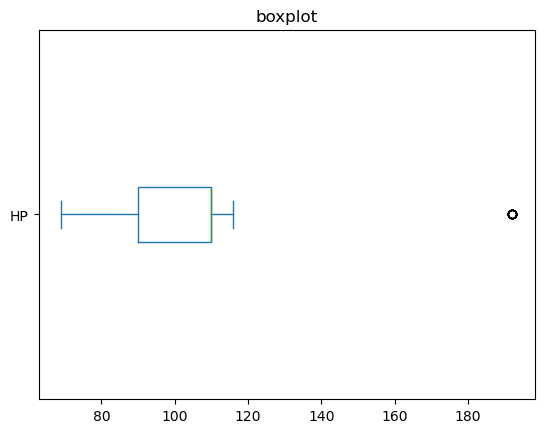

In [25]:
boxplot_HP = df["HP"].plot(kind="box",vert=False,title="boxplot")
boxplot_HP

In [26]:
Q1 = np.percentile(df["HP"],25)
Q3 = np.percentile(df["HP"],75)
IQR = Q3 - Q1
IQR

np.float64(20.0)

In [27]:
UW = Q3 + (1.5*IQR)
UW

np.float64(140.0)

In [28]:
print("#outliers are:",len(df[df["HP"]>UW]))

#outliers are: 11


In [29]:
df.loc[df["HP"] > UW, "HP"] = UW

In [30]:
df["HP"].describe()

count    1436.00000
mean      101.10376
std        13.14745
min        69.00000
25%        90.00000
50%       110.00000
75%       110.00000
max       140.00000
Name: HP, dtype: float64

<Axes: title={'center': 'boxplot'}>

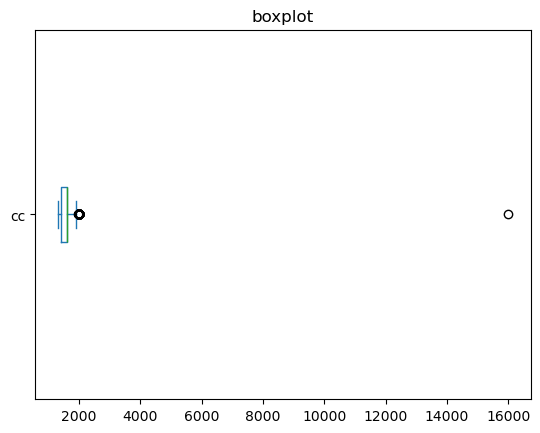

In [31]:
boxplot_cc = df["cc"].plot(kind="box",vert=False,title='boxplot')
boxplot_cc

In [32]:
Q1 = np.percentile(df["cc"],25)
Q3 = np.percentile(df["cc"],75)
IQR = Q3 - Q1
IQR

np.float64(200.0)

In [33]:
UW = Q3 + (1.5*IQR)
UW

np.float64(1900.0)

In [34]:
print("#outliers are:",len(df[df["cc"]>UW]))

#outliers are: 123


In [35]:
df.loc[df["cc"] > UW, "cc"] = UW

In [36]:
df["cc"].describe()

count    1436.000000
mean     1558.565460
std       168.970222
min      1300.000000
25%      1400.000000
50%      1600.000000
75%      1600.000000
max      1900.000000
Name: cc, dtype: float64

<Axes: title={'center': 'boxplot'}>

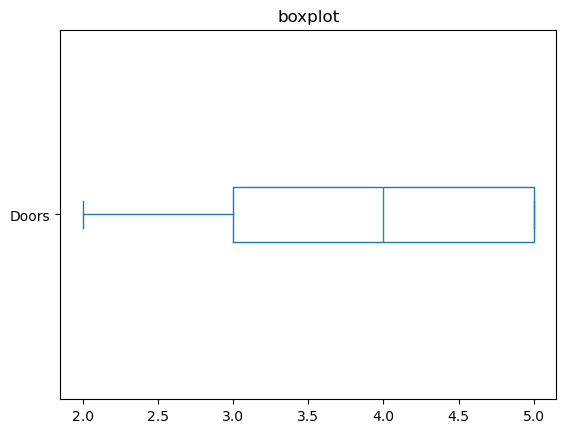

In [37]:
boxplot_Doors = df["Doors"].plot(kind="box",vert=False,title="boxplot")
boxplot_Doors

In [38]:
# no outliers in the above one, so going to the next one

<Axes: title={'center': 'boxplot'}>

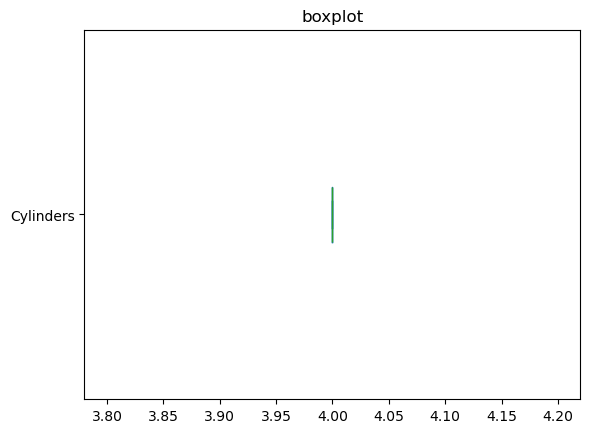

In [39]:
boxplot_cylinders = df["Cylinders"].plot(kind="box",vert=False,title="boxplot")
boxplot_cylinders

<Axes: title={'center': 'boxplot'}>

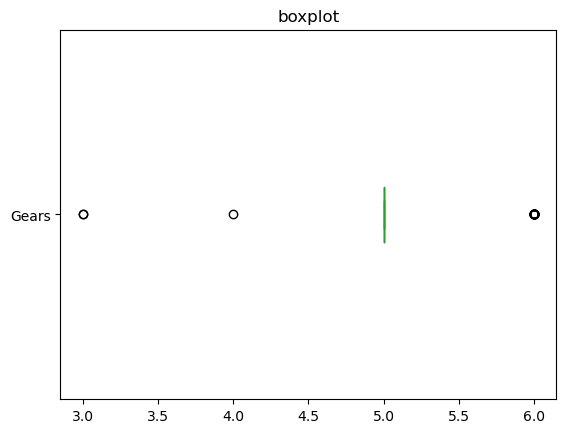

In [40]:
boxplot_Gears = df["Gears"].plot(kind="box",vert=False,title="boxplot")
boxplot_Gears

<Axes: title={'center': 'boxplot'}>

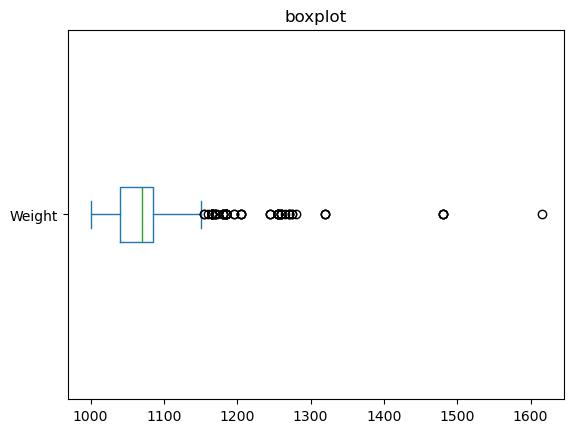

In [41]:
boxplot_Weight = df["Weight"].plot(kind="box",vert=False,title='boxplot')
boxplot_Weight

In [42]:
Q1 = np.percentile(df["Weight"],25)
Q3 = np.percentile(df["Weight"],75)
IQR = Q3 - Q1
IQR

np.float64(45.0)

In [43]:
UW = Q3 + (1.5 * IQR)
UW

np.float64(1152.5)

In [44]:
print("#outliers are:",len(df[df["Weight"]>UW]))

#outliers are: 66


In [45]:
df.loc[df["Weight"] > UW, "Weight"] = int(UW)

In [46]:
df["Weight"].describe()

count    1436.000000
mean     1068.556407
std        37.723646
min      1000.000000
25%      1040.000000
50%      1070.000000
75%      1085.000000
max      1152.000000
Name: Weight, dtype: float64

In [47]:
# standardization

In [48]:
# we have to perform standardization because all the "X" variables have different units. Once
# data is standardized the units will be removed and we can go further with next steps.

In [51]:
X= df.loc[:, ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']]
X.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986.0,90,0,1900,3,4,5,1152
1,23,72937.0,90,0,1900,3,4,5,1152
2,24,41711.0,90,0,1900,3,4,5,1152
3,26,48000.0,90,0,1900,3,4,5,1152
4,30,38500.0,90,0,1900,3,4,5,1152


In [52]:
# standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(X)
SS_X.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.775799,-0.593750,-0.84485,-0.242893,2.021383,-1.085139,0.0,-0.140425,2.212741
1,-1.775799,0.153546,-0.84485,-0.242893,2.021383,-1.085139,0.0,-0.140425,2.212741
2,-1.721920,-0.745652,-0.84485,-0.242893,2.021383,-1.085139,0.0,-0.140425,2.212741
3,-1.614162,-0.564551,-0.84485,-0.242893,2.021383,-1.085139,0.0,-0.140425,2.212741
4,-1.398645,-0.838117,-0.84485,-0.242893,2.021383,-1.085139,0.0,-0.140425,2.212741


In [53]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

In [55]:
OH = OHE.fit_transform(df[["Fuel_Type"]]).toarray() 
OH = pd.DataFrame(OH)
OH.columns = ["CNG","Diesel","Petrol"] 
OH.head()

,CNG,Diesel,Petrol
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [56]:
X_final = pd.concat([SS_X,OH],axis=1)
X_final.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,CNG,Diesel,Petrol
0,-1.775799,-0.593750,-0.84485,-0.242893,2.021383,-1.085139,0.0,-0.140425,2.212741,0.0,1.0,0.0
1,-1.775799,0.153546,-0.84485,-0.242893,2.021383,-1.085139,0.0,-0.140425,2.212741,0.0,1.0,0.0
2,-1.721920,-0.745652,-0.84485,-0.242893,2.021383,-1.085139,0.0,-0.140425,2.212741,0.0,1.0,0.0
3,-1.614162,-0.564551,-0.84485,-0.242893,2.021383,-1.085139,0.0,-0.140425,2.212741,0.0,1.0,0.0
4,-1.398645,-0.838117,-0.84485,-0.242893,2.021383,-1.085139,0.0,-0.140425,2.212741,0.0,1.0,0.0


In [57]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Price"] = LE.fit_transform(df["Price"])
Y = df["Price"]
Y

0       161
1       162
2       164
3       169
4       162
       ... 
1431     45
1432    117
1433     66
1434     36
1435     29
Name: Price, Length: 1436, dtype: int64

In [58]:
# splitting data --- data partition

In [59]:
# the entire data will be divided into two parts -- training data(70%) and testing data(20%)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_final,Y,test_size = 0.30,random_state = 100)

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [65]:
model.fit(X_train,Y_train)

LinearRegression()

In [66]:
Y_pred= model.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
r2 = r2_score(Y_test, Y_pred)
print("R2 score:", np.round(r2, 2))

R2 score: 0.83


In [77]:
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", np.round(mse, 2))

MSE: 464.94


In [78]:
rmse = np.sqrt(mse)
print("RMSE:", np.round(rmse, 2))

RMSE: 21.56


In [89]:
# model1

In [84]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)  
sm_model = sm.OLS(Y_train, X_train_sm).fit()

In [86]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     524.7
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:36:38   Log-Likelihood:                -4478.9
No. Observations:                1005   AIC:                             8980.
Df Residuals:                     994   BIC:                             9034.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.7098      2.289     32.638      0.000      70.218      79.202
Age_08_04    -35.1701      1.031    -34.117      0.000     -37.193     -33.147
KM           -10.8281      0.968    -11.182      0.000     -12.728      -8.928
HP             8.8623      2.063      4.297      0.000       4.815      12.910
Automatic      2.2440      0.708      3.170      0.002       0.855       3.633
cc            -4.0181      2.347     -1.712      0.087      -8.623       0.587
Doors          2.4998      0.794      3.149      0.002       0.942       4.058
Cylinders  -3.397e-14   1.07e-14     -3.160      0.002   -5.51e-14   -1.29e-14
Gears          3.2269      0.677      4.769      0.000       1.899       4.555
Weight         7.2159      1.429      5.051      0.000       4.412      10.019
CNG            8.2261      5.290      1.555      0.120      -2.155      18.607
Diesel        38.7322      6.717      5.767      0.000      25.552      51.913
Petrol        27.7515      3.079      9.014      0.000      21.710      33.793
==============================================================================
Omnibus:                       32.877   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.977
Skew:                          -0.267   Prob(JB):                     1.90e-12
Kurtosis:                       4.002   Cond. No.                     9.37e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.57e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [87]:
# from the table we can observe cc and cng as insignificant so we can remove them

In [88]:
VIF = 1/(1-r2)
print("VIF:", np.round(VIF,2))

VIF: 5.88


In [90]:
# so I am removing them for model 2 

In [92]:
X_train_model2 = X_train[['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors',
                          'Cylinders', 'Gears', 'Weight', 'Petrol', 'Diesel']]

In [94]:
X_train_model2_sm = sm.add_constant(X_train_model2)
sm_model2 = sm.OLS(Y_train, X_train_model2_sm).fit()

In [95]:
sm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     581.6
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:52:35   Log-Likelihood:                -4480.4
No. Observations:                1005   AIC:                             8981.
Df Residuals:                     995   BIC:                             9030.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.9708      6.274     13.544      0.000      72.660      97.282
Age_08_04    -35.5457      1.008    -35.256      0.000     -37.524     -33.567
KM           -11.1438      0.952    -11.711      0.000     -13.011      -9.276
HP             5.8147      1.044      5.572      0.000       3.767       7.863
Automatic      2.2532      0.708      3.180      0.002       0.863       3.644
Doors          2.5739      0.793      3.244      0.001       1.017       4.131
Cylinders   2.808e-15   1.29e-15      2.182      0.029    2.82e-16    5.33e-15
Gears          3.2867      0.676      4.859      0.000       1.959       4.614
Weight         6.6042      1.385      4.770      0.000       3.887       9.321
Petrol        18.9539      6.390      2.966      0.003       6.415      31.492
Diesel        16.4969      7.167      2.302      0.022       2.433      30.561
==============================================================================
Omnibus:                       32.889   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.768
Skew:                          -0.275   Prob(JB):                     3.48e-12
Kurtosis:                       3.979   Cond. No.                     1.45e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.37e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
# testing

In [101]:
X_test_model2 = X_test[['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors','Cylinders', 'Gears', 'Weight', 'Petrol', 'Diesel']]
X_test_model2_sm = sm.add_constant(X_test_model2)

In [102]:
Y_pred_model2 = sm_model2.predict(X_test_model2_sm)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
r2 = r2_score(Y_test, Y_pred_model2)
print("R2 score:", np.round(r2, 2))

R2 score: 0.83


In [106]:
mse = mean_squared_error(Y_test, Y_pred_model2)
print("MSE:", np.round(mse, 2))

MSE: 464.19


In [107]:
rmse = np.sqrt(mse)
print("RMSE:", np.round(rmse, 2))

RMSE: 21.54


In [108]:
VIF = 1/(1-r2)
print("VIF:", np.round(VIF,2))

VIF: 5.89


In [110]:
# since there is no change I am removing other insignificant variables and proceeding with next model 
# model3

In [152]:
X_train_model3 = X_train[['Age_08_04','KM', 'HP', 'Weight', 'Automatic', 'Diesel']]
X_test_model3 = X_test[['Age_08_04','KM', 'HP', 'Weight', 'Automatic', 'Diesel']]

In [153]:
import statsmodels.api as sm
X_train_model3_sm = sm.add_constant(X_train_model3)

In [154]:
sm_model3 = sm.OLS(Y_train, X_train_model3_sm).fit()

In [155]:
sm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     832.8
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:38:12   Log-Likelihood:                -4501.1
No. Observations:                1005   AIC:                             9016.
Df Residuals:                     998   BIC:                             9051.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.9791      0.825    126.109      0.000     102.361     105.597
Age_08_04    -35.1637      1.022    -34.392      0.000     -37.170     -33.157
KM           -11.3569      0.945    -12.015      0.000     -13.212      -9.502
HP             5.9128      1.045      5.657      0.000       3.862       7.964
Weight         8.2374      1.224      6.729      0.000       5.835      10.639
Automatic      1.4493      0.702      2.066      0.039       0.073       2.826
Diesel        -5.3542      4.408     -1.215      0.225     -14.004       3.296
==============================================================================
Omnibus:                       33.583   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.286
Skew:                          -0.297   Prob(JB):                     7.30e-12
Kurtosis:                       3.934   Cond. No.                         9.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
# preparing testing model

In [157]:
X_test_model3_sm = sm.add_constant(X_test_model3)

In [158]:
Y_pred_model3 = sm_model3.predict(X_test_model3_sm)

In [159]:
from sklearn.metrics import r2_score, mean_squared_error

In [160]:
r2 = r2_score(Y_test, Y_pred_model3)
print("R2 score:", np.round(r2, 2))

R2 score: 0.83


In [161]:
mse = mean_squared_error(Y_test, Y_pred_model3)
print("MSE:", np.round(mse, 2))

MSE: 464.44


In [162]:
rmse = np.sqrt(mse)
print("RMSE:", np.round(rmse, 2))

RMSE: 21.55


In [163]:
# i am concluding this model 3 as the best fit model as of now because it has no multicollinearity
# issues and i minimized the usage of the variables and even then i have the same metrics 

In [164]:
from sklearn.linear_model import Lasso

In [165]:
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train_model3, Y_train)

Lasso(alpha=0.1)

In [166]:
Y_pred_lasso = lasso_model.predict(X_test_model3)

In [167]:
r2_lasso = r2_score(Y_test, Y_pred_lasso)
print("R2:", np.round(r2_lasso, 2))

R2: 0.83


In [168]:
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print("MSE:", np.round(mse_lasso, 2))

MSE: 462.83


In [169]:
rmse_lasso = np.sqrt(mse_lasso)
print("RMSE:", np.round(rmse_lasso, 2))

RMSE: 21.51


In [170]:
print("Coefficients:", lasso_model.coef_)

Coefficients: [-35.22377471 -11.47989699   6.5192418    7.3829674    1.51930559
  -1.42985869]


In [171]:
# ridge regression

In [172]:
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(X_train_model3, Y_train)

Ridge(alpha=0.1)

In [173]:
Y_pred_ridge = ridge_model.predict(X_test_model3)

In [174]:
r2_ridge = r2_score(Y_test, Y_pred_ridge)
print("R2:", np.round(r2_ridge, 2))

R2: 0.83


In [175]:
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
print("MSE:", np.round(mse_ridge, 2))

MSE: 464.44


In [176]:
rmse_ridge = np.sqrt(mse_ridge)
print("RMSE:", np.round(rmse_ridge, 2))

RMSE: 21.55


In [177]:
print("Coefficients:", ridge_model.coef_)

Coefficients: [-35.15848295 -11.35994556   5.91558871   8.23560131   1.44942793
  -5.33458073]


In [178]:
# as per my observation in this dataset, all the three models i have tried to fit have 
# identifical r square, rmse and even lasso and ridge didnt show much impact, which i took as
# it have minimum requriment of regularization. so I am thinking this model can predict well and 
# it might be best-fit model

In [179]:
# normalization and standardization are the two methods to remove the units from the variables.
# standardization values always lies in between -3 to 3 and once the data is standardized
# there will be no units. It is generally performed on numerical variables
# normalization is also known as scaling and those values lies in between 0 to 1.

# once the data is standardized , it takes less time to compute and processes the calculations
# quickly compared to large datasets or the data which isnt standardized. 

# in both of them any one can be applied 
# it is only applicable on continuous variables.

In [ ]:
# muliticollinearity : 
# if any two X variables are highly correlated among them than with the target variable(Y), then
# multicollinearity issues arise.

#we can decide multicollinearity by Variance Inflation Factor.
# if VIF<5 --- model doesnt have multicollinearity
# if VIF --(5-10) -- model have multicollinearity but still can accepetable as it is moderate
# if VIF>10 -- model has too much multicollinearity and cannot be accepted.